<a href="https://colab.research.google.com/github/guillermohenrion/Intro-Python/blob/master/%C3%81rboles_de_decisi%C3%B3n_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Parte 1 (20 minutos)

i) Definir una función que genere N puntos con M atributos siguiendo una distribución gaussiana.

[Generar datos sintéticos con scikit](https://towardsdatascience.com/https-medium-com-faizanahemad-generating-synthetic-classification-data-using-scikit-1590c1632922)

```def dataset_sintetico_gausianas(medias,covs,n_puntos,etiquetas)```

Si llamamos a esta funcion con: 
```
c1_mean = [0,3]
c2_mean = [3,0]
c3_mean = [2,3]
c4_mean = [3,0]
medias = [c1_mean,c2_mean,c3_mean,c4_mean]
cov = [[0.4,0],[0,1.2]]
covs = [cov,cov,cov,cov]
n_puntos = [100,100,100,100]
etiquetas = ['A','B','B','A']
```

Esto significa que tengo dos gaussianas bivariadas, una con media (0,3) y la otra media (3,0), las dos con la matriz Identidad como matriz de covarianza, y una corresponde a la clase 'A', y la otra a 'B'. De la clase 'A' muestreo 100 puntos, y de la 'B' 200.
La función debe devolver un dataframe con los 300 puntos como filas, cada eje como columna (en este caso 2 porque la gausiana es bivariada), y una columna extra con nombre 'Clase' que indique si el punto pertenece a 'A' o a 'B'.

Tip:
np.random.multivariate_normal permite generar gausianas multivariadas.

ii) Realizar un scatter plot como el mostrado debajo utilizando la función scatterplot de seaborn con el dataframe que devuelve la función al ser llamado con los argumentos dados como ejemplo.

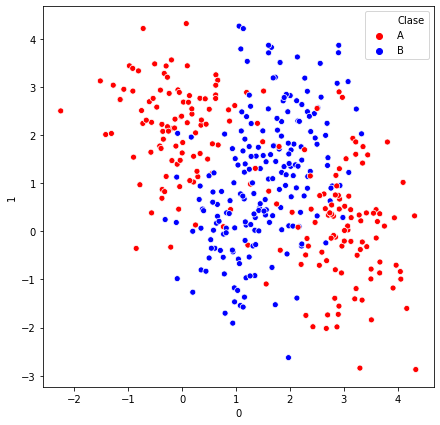

In [0]:
def dataset_sintetico_gausianas(means,covs,points,labels,seed=1234):
  all_dfs = []
  np.random.seed(seed)
  for mean_i,cov_i,points_i,label_i in zip(means,covs,points,labels):
    features_i = np.random.multivariate_normal(mean=mean_i, cov=cov_i,size=points_i)
    dataset_i = pd.DataFrame(features_i)
    dataset_i['Clase'] = label_i
    all_dfs.append(dataset_i)
  
  return pd.concat(all_dfs)


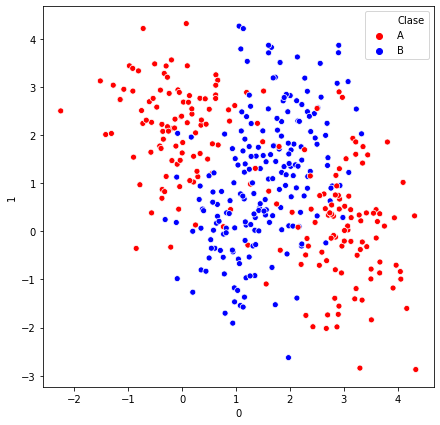

In [65]:
cov = [[0.4,0],[0,1.2]]
c1_mean = [0,2]
c2_mean = [1,0]
c3_mean = [2,2]
c4_mean = [3,0]

dataset = dataset_sintetico_gausianas([c1_mean,c2_mean,c3_mean,c4_mean],[cov,cov,cov,cov],[100,100,100,100],['A','B','B','A'])

plt.figure(figsize=(7,7))
sns.scatterplot(x=0,y=1,hue='Clase',data=dataset,palette={'A':'red','B':'blue'})


# Parte 2 (15 minutos)

Vamos a armar un árbol de decisión desde cero!

![alt text](https://elf11.github.io/images/decisionTree.png "Logo Title Text 1")

Para construir un árbol, debemos encontrar qué atributo dividir, y a partir de qué valor. Lo primero que vamos a hacer es:

i) Definir una función **partir** que toma como argumentos un dataframe, el nombre de un descriptor, y un valor. Lo que devuelve es una lista con 2 dataframes, uno conteniendo aquellas instancias en donde el descriptor es menor al valor, y otro conteniendo aquellas instancias en donde el descriptor es mayor al valor.

Ahora que podemos dividir nuestro dataset en subgrupos, queremos ver qué tan buena es esa división. Para eso tenemos que utilizar alguna medida de cuán puros quedaron los subgrupos. Si al dividir en grupos, en uno quedaron 50 instancias de la clase A y 50 de la B, y en el otro lo mismo, la división será mala. En cambio, si en uno de los grupos quedaron solo las instancias de la clase A y en el otro solo las de la clase B, entonces esa es una buena división.

Una medida posible es la **entropía**:

$H(x) = -\sum_{i=0}^{N}p_x(x_i)log(p_x(x_i))$

En donde $p_x(x_i)$ es la probabilidad de que un dato perteneciente a X (nuestro dataset), pertenezca a la clase i. Para aproximar esta probabilidad, debemos contar cuántas la proporción de muestras en el grupo que pertenecen a la clase i.

Otra medida utilizada es la **impureza de Gini**:

$G(x) = -\sum_{i=0}^{N}p_x(x_i)(1-p_x(x_i))$


ii) Implementar una función que al darle una lista con los 2 grupos (dataframes) devuelve una de las medidas descritas anteriormente (elegir una).
Tener en cuenta que vamos a obtener una medida de impureza de Gini o de entropia $G_i$ para cada grupo. Estas deberan combinarse mediante una suma pesada por el tamaño $N_i$ de cada particion respecto al total de los tamaños. En este caso en el que dividimos binariamente sería:

$G_1\frac{N_1}{N_1+N_2} + G_2\frac{N_2}{N_1+N_2}$


iii) Armar 2 casos extremos, uno en el que cada grupo contiene una sola clase, y otro en el que los grupos contienen la misma cantidad de muestras para cada clase. Pasarlos a la función implementada en ii) y ver los valores que toma.

In [0]:
def partir(dataset,feature,valor):
  datos_menor = dataset[dataset[feature] < valor]
  datos_mayor = dataset[dataset[feature] >= valor]
  return [datos_menor,datos_mayor]

In [0]:
def impureza_gini(grupos):
  datos_completos = pd.concat(grupos)
  N = len(datos_completos)
  gini = 0
  for grupo in grupos:
    props = grupo['Clase'].value_counts(normalize=True)
    props = props.dropna()
    gini_i = (props*(1-props)).sum()
    gini += gini_i*(len(grupo)/N)
  return gini

def entropia(grupos):
  datos_completos = pd.concat(grupos)
  N = len(datos_completos)
  entropia = 0
  for grupo in grupos:
    props = grupo['Clase'].value_counts(normalize=True)
    props = props.dropna()
    ent_i = -(props*np.log2(props)).sum()
    entropia += ent_i*(len(grupo)/N)
  return entropia

In [68]:
df_a = dataset[dataset['Clase']=='A']
df_b = dataset[dataset['Clase']=='B']

#Peor caso:
g1 = pd.concat([df_a.iloc[:int(len(df_a)/2)],df_b.iloc[:int(len(df_b)/2)]])
g2 = pd.concat([df_a.iloc[int(len(df_a)/2):],df_b.iloc[int(len(df_b)/2):]])

print('Peor caso: {}'.format(impureza_gini([g1,g2])))

g1 = df_a
g2 = df_b

print('Mejor caso: {}'.format(impureza_gini([g1,g2])))

Peor caso: 0.5
Mejor caso: 0.0


# Parte 3 (15 minutos)

Vamos muy bien! Ya tenemos una función que divide nuestros datos en grupos, y tenemos otra función que nos dice cuán buena es la división. Ahora lo que tenemos que encontrar es cuál es la mejor división posible:

i) Implementar una función **buscar_mejor_particion** que tome como argumentos: un dataframe con los datos para particionar, y una lista con el nombre de los descriptores en los que se hará la búsqueda. Deberá devolver un diccionario que represente a la mejor partición. Deberá contener las siguientes claves:

* 'feature': Nombre del descriptor que uso para partir los datos.
* 'valor': Valor a partir del cual los partió.
* 'costo': Impureza de Gini o Entropia.
* 'l' y 'r': Dataframes con las particiones encontradas.

ii) Pasar el dataset sintético a la función definida en i). Cuál es la decisión tomada? Tiene sentido?

In [0]:
def buscar_mejor_particion(datos,features):
  minimo_gini = 1
  for feature in features:
    for idx, dato in datos.iterrows():
      valor = dato[feature]
      grupos = partir(datos,feature,valor)
      gini = entropia(grupos)
      if gini<minimo_gini:
        minimo_gini = gini
        mejor_particion = {'feature': feature, 'valor': dato[feature], 'gini': minimo_gini, 'l': grupos[0], 'r': grupos[1]}
  return mejor_particion

In [70]:
mejor = buscar_mejor_particion(dataset,[0,1])
print('{} < {}'.format(mejor['feature'],mejor['valor']))

0 < 0.31688700409686354


# Parte 4 - All together (30 minutos)

Ya casi estamos! Ahora necesitamos seguir tomando decisiones recursivamente. En la Parte 3, logramos implementar el primer nivel del árbol. En esta parte lo que haremos es agregar niveles de forma recursiva hasta que cierto criterio se cumpla. Este criterio puede ser:

* Se alcanza cierta profundidad máxima del árbol.
* Se alcanza un mínimo número de instancias a partir.
* Se alcanza una impureza mínima.

O se puede dejar corriendo hasta que todos los nodos sean puros, aunque eso probablemente lleve a **overfitting**.

i) Implementar una función que tome como argumentos: un dataframe con datos, una lista con los atributos, máxima profundidad y mínimo número de instancias por hoja. Esta función devolverá un árbol de decisión en forma de diccionario (similar al diccionario que devuelve la función buscar_mejor_particion, pero con 'l' y 'r' siendo nuevos diccionarios.

ii) Implementar una función que tome el árbol entrenado en i) y prediga en un nuevo set de datos la clase

iii) Visualizar la frontera de decisión de un árbol sencillo y de uno más complejo

In [0]:
def division_recursiva(datos,features,profundidad_actual,maxima_profundidad,min_inst_hoja):
  l = datos['l']
  r = datos['r']

  if isinstance(l,pd.core.frame.DataFrame):
    clases_l = l['Clase'].value_counts()
    if (len(clases_l) > 1) & (profundidad_actual<maxima_profundidad) & (clases_l.sum()>min_inst_hoja):
      l_part = buscar_mejor_particion(l,features)
      datos['l'] = division_recursiva(l_part,features,profundidad_actual+1,maxima_profundidad,min_inst_hoja)
    else:
      datos['l'] = clases_l.idxmax()

  if isinstance(r,pd.core.frame.DataFrame):
    clases_r = r['Clase'].value_counts()
    if (len(clases_r) > 1) & (profundidad_actual<maxima_profundidad) & (clases_r.sum()>min_inst_hoja):
      r_part = buscar_mejor_particion(r,features)  
      datos['r'] = division_recursiva(r_part,features,profundidad_actual+1,maxima_profundidad,min_inst_hoja)
    else:
      datos['r'] = clases_r.idxmax()

  return datos

In [0]:
def entrenar_arbol(dataset,features,maxima_profundidad,min_inst_hoja):
  nivel_1 = buscar_mejor_particion(dataset,features)
  arbol = division_recursiva(nivel_1,features,1,maxima_profundidad,min_inst_hoja)

  return arbol

In [0]:
arbol_entrenado_1 = entrenar_arbol(dataset,[0,1],3,5)
arbol_entrenado_2 = entrenar_arbol(dataset,[0,1],50,1)

In [74]:
def print_tree(tree,sep=''):
  print('{} {} < {:.2f}'.format(sep,tree['feature'],tree['valor']))
  print('{} SI'.format(sep))
  if isinstance(tree['l'],str):
    print('{} {}'.format(sep+'-',tree['l']))
  else:
    print_tree(tree['l'],sep=sep+'-')

  print('{} NO'.format(sep))
  if isinstance(tree['r'],str):
    print('{} {}'.format(sep+'-',tree['r']))
  else:
    print_tree(tree['r'],sep=sep+'-')

print_tree(arbol_entrenado_1)

 0 < 0.32
 SI
- 1 < 0.39
- SI
-- 1 < -0.35
-- SI
--- B
-- NO
--- A
- NO
-- 0 < -0.10
-- SI
--- A
-- NO
--- A
 NO
- 0 < 2.77
- SI
-- 0 < 2.27
-- SI
--- B
-- NO
--- B
- NO
-- 1 < 2.03
-- SI
--- A
-- NO
--- B


In [0]:
def predecir(arbol,datos):
  feat = arbol['feature']
  val = arbol['valor']
  if datos[feat] < val:
    if isinstance(arbol['l'],str):
      clase = arbol['l']
    else:
      clase = predecir(arbol['l'],datos)
  else:
    if isinstance(arbol['r'],str):
      clase = arbol['r']
    else:
      clase = predecir(arbol['r'],datos)
  return clase

In [0]:
grid = np.meshgrid(np.arange(-3,6,0.1),np.arange(-3,6,0.1))
x_vals = grid[0].reshape(-1,1)
y_vals = grid[1].reshape(-1,1)

datos_frontera = pd.DataFrame(np.concatenate([x_vals,y_vals],axis=1))
datos_frontera['Clase_Arbol1'] = datos_frontera.apply(lambda x: predecir(arbol_entrenado_1,x),axis=1)
datos_frontera['Clase_Arbol2'] = datos_frontera.apply(lambda x: predecir(arbol_entrenado_2,x),axis=1)

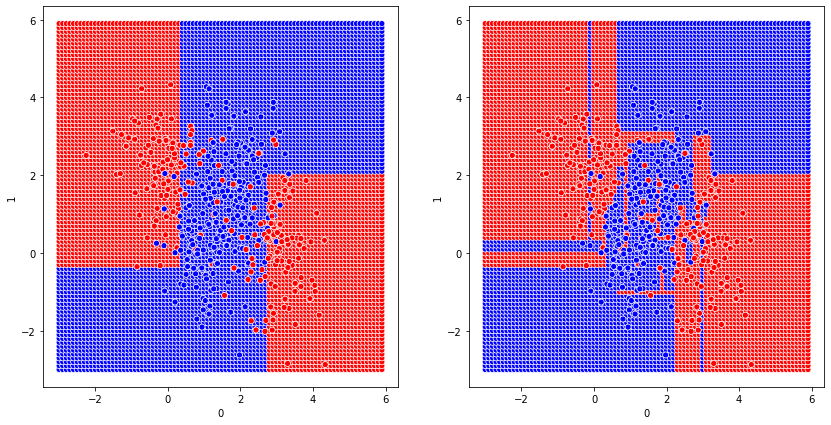

In [77]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(14,7))
sns.scatterplot(x=0,y=1,hue='Clase_Arbol1',data=datos_frontera,palette={'A':'red','B':'blue'},ax=ax[0])
sns.scatterplot(x=0,y=1,hue='Clase',data=dataset,palette={'A':'red','B':'blue'},ax=ax[0])
ax[0].get_legend().remove()
sns.scatterplot(x=0,y=1,hue='Clase_Arbol2',data=datos_frontera,palette={'A':'red','B':'blue'},ax=ax[1])
sns.scatterplot(x=0,y=1,hue='Clase',data=dataset,palette={'A':'red','B':'blue'},ax=ax[1])
ax[1].get_legend().remove()

###Cosas a tener en cuenta:

* Las fronteras de decisión son ortogonales (solo puede dividir con rectas a 90° entre si.
* Un árbol lo suficientemente profundo podría aproximar cualquier función matemática (de las normalitas)
* Modelo más complejo != Modelo que mejor generaliza
* Trabajamos en 2D para poder visualizar las cosas, pero en la práctica, el número de dimensiones, que equivale al número de atributos usados, es mucho mayor a lo que podemos observar.

![alt text](https://pbs.twimg.com/media/Dtq79-1X4AA7lJW.jpg)

Generemos otro dataset que siga la misma distribución y veamos cuál árbol da mejor:

In [0]:
dataset_test = dataset_sintetico_gausianas([c1_mean,c2_mean,c3_mean,c4_mean],[cov,cov,cov,cov],[1000,1000,1000,1000],['A','B','B','A'],seed=2345)

pred_arbol1 = dataset_test.apply(lambda x: predecir(arbol_entrenado_1,x),axis=1).values
pred_arbol2 = dataset_test.apply(lambda x: predecir(arbol_entrenado_2,x),axis=1).values

clases_verdaderas = dataset_test['Clase'].values

In [79]:
from sklearn.metrics import accuracy_score

print('Acc Arbol Sencillo: {}'.format(accuracy_score(clases_verdaderas,pred_arbol1)))
print('Acc Arbol Complejo: {}'.format(accuracy_score(clases_verdaderas,pred_arbol2)))

Acc Arbol Sencillo: 0.7915
Acc Arbol Complejo: 0.78975


# La forma fácil

Ahora que ya entendemos a fondo cómo funcionan los árboles de decisión, y hasta los programamos nosotros, podemos relajarnos y que nuestra vida sea más sencilla usando [Scikit-Learn](https://scikit-learn.org/stable/), que permite utilizar de forma sencilla un montón de algorítmos de Machine Learning, y además contiene una documentación muy detallada y comprensiva, la cual es un muy completo recurso para aprender algorítmos de Machine Learning.

Scikit-Learn trae algunos datasets de juguetes para probar algoritmos de ML:

In [0]:
from sklearn.datasets import load_breast_cancer

data_breast = load_breast_cancer()

Casi todo en scikit-learn se utiliza de la misma manera:
1.  Se instancia un modelo, pasándole sus parámetros.
2.  Se ajusta/entrena el modelo mediante el método fit, el cual recibe los datos de entrada y el target
3.  Se predice sobre nuevos datos utilizando el método predict
4.  Se evalua la performance utilizando metricas en el modulo sklearn.metrics



# Dividir en entreamiento y validación 

In [0]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

data=data_breast
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=0.3, random_state=42)


#Ajustar el árbol

In [82]:
arbol_sklearn = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=1, ccp_alpha=0)
arbol_sklearn.fit(X_train,y_train)
y_pred_test = arbol_sklearn.predict(X_test)
y_pred_train = arbol_sklearn.predict(X_train)

print('Train acc: {}'.format(accuracy_score(y_train,y_pred_train)))
print('Test acc: {}'.format(accuracy_score(y_test,y_pred_test)))

Train acc: 0.992462311557789
Test acc: 0.9590643274853801


#Predicción del y_test y matriz de confusión

In [0]:
predictions=arbol_sklearn.predict(X_test)

In [84]:
from sklearn.metrics import confusion_matrix

confusion_matrix( y_test , predictions)

array([[ 59,   4],
       [  3, 105]])

#Graficar el árbol

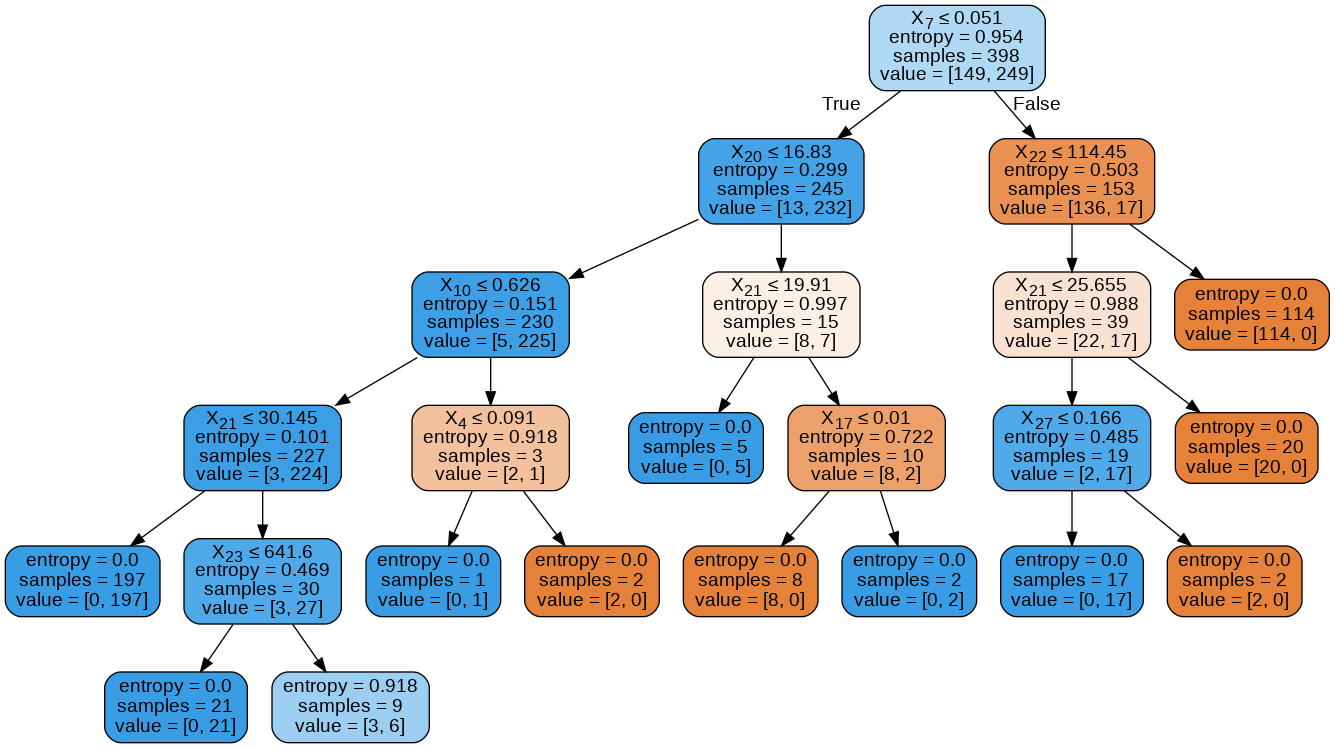

In [85]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

dot_data = StringIO()
export_graphviz(arbol_sklearn, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#Podar del árbol



In [86]:

arbol_sklearn = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=1, ccp_alpha=0.05)
arbol_sklearn.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.05, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

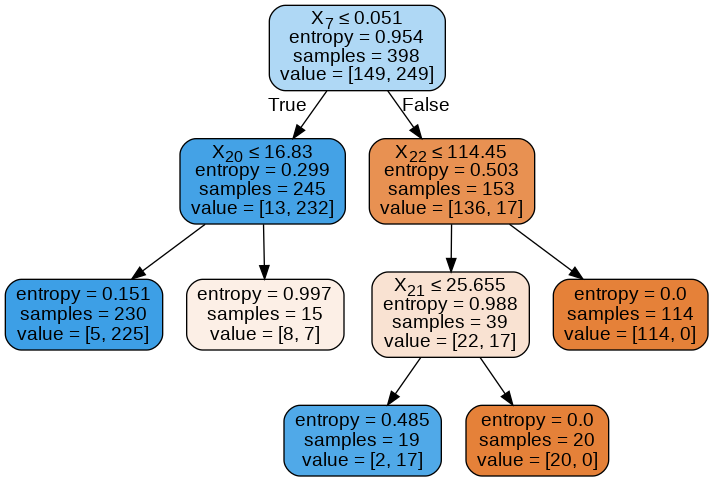

In [87]:
dot_data = StringIO()
export_graphviz(arbol_sklearn, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#Imputar valores nulos

In [117]:
from sklearn import preprocessing
import numpy as np
from sklearn.impute import SimpleImputer
df=pd.DataFrame(data.data)
df.head()

imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
transformed_values = imputer.fit_transform(df.values)
dft=pd.DataFrame(transformed_values )
dft.columns=df.columns
print(df.head())
df.Humidity[2]=0
dft.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Codificar valores categóricos

In [0]:
c=[[]]*5
le=[preprocessing.LabelEncoder()]*5
col=a.columns

for i in range(0,len(col)):
  c[i]=(le[i].fit(attributes[i])).transform(a[col[i]])

df=pd.DataFrame(np.transpose(c), columns=col)
df.head()